In [118]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [119]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [120]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Machine learning
import sklearn
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

 # KNN
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

# Supervised Learning
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

# Naive
from sklearn.naive_bayes import GaussianNB

#decision_tree

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier




In [121]:
df = pd.read_csv(r"E:\שנה ב\סמסטר ב\מדעי הנתונים\פרויקט\Oz_Ido\games_df.csv")

df.drop(['Unnamed: 0','total_sales'],axis=1, inplace = True)
df

,name,developer,platform,genre,na_sales,eu_sales,japan_sales,other_sales,release_year
0,Grand Theft Auto V Read the review,Rockstar North,PS3,Action,6.37,9.85,0.99,3.12,2013
1,Grand Theft Auto V,Rockstar North,PS4,Action,6.06,9.71,0.60,3.02,2014
2,Grand Theft Auto: Vice City,Rockstar North,PS2,Action,8.41,5.49,0.47,1.78,2002
3,Grand Theft Auto V,Rockstar North,X360,Action,9.06,5.33,0.06,1.42,2013
4,Grand Theft Auto III,DMA Design,PS2,Action,6.99,4.51,0.30,1.30,2001
...,...,...,...,...,...,...,...,...,...
18914,"Nora, Princess, and Stray Cat",Harukaze,NS,Visual Novel,0.01,0.01,0.00,0.01,2018
18915,Memories Off: Innocent File,5pb. Games,NS,Visual Novel,0.01,0.01,0.00,0.01,2018
18916,Enkan no Memoria: Kakera Tomoshi,A'sRing,PSV,Visual Novel,0.01,0.01,0.00,0.01,2018
18917,Disorder 6,5pb. Games,X360,Visual Novel,0.01,0.01,0.00,0.01,2013


In [122]:
column_names_to_normalize = ['other_sales','na_sales', 'eu_sales', 'japan_sales']
min_max_scaler = preprocessing.MinMaxScaler()
x = df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
df[column_names_to_normalize] = df_temp

platform_type = {'2600':"console",'3DO':"console",'3DS':"handheld",'DC':"console",'DS':"handheld",
                 'GB':"handheld",'GBA':"handheld",'GBC':"handheld",'GC':"console",'GEN':"console",
                 'GG':"console",'Mob':"handheld",'N64':"console",'NES':"console",'NG':"console",
                 'NS':"handheld",'OSX':"PC",'PC':"PC",'PCE':"console",'PCFX':"console",'PS':"handheld",
                 'PS2':"console",'PS3':"console",'PS4':"console",'PSN':"PC",'PSP':"handheld",'PSV':"handheld",
                 'SAT':"console",'SCD':"handheld",'SNES':"console",'VC':"console",'Wii':"console",
                 'WiiU':"handheld",'WS':"handheld",'WW':"console",'X360':"console",'XB':"console",
                 'XBL':"console",'XOne':"console"}
                


df["platform_type"] = df["platform"].map(lambda x: platform_type[x])

df

,name,developer,platform,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type
0,Grand Theft Auto V Read the review,Rockstar North,PS3,Action,0.652664,1.000000,0.456221,1.000000,2013,console
1,Grand Theft Auto V,Rockstar North,PS4,Action,0.620902,0.985787,0.276498,0.967949,2014,console
2,Grand Theft Auto: Vice City,Rockstar North,PS2,Action,0.861680,0.557360,0.216590,0.570513,2002,console
3,Grand Theft Auto V,Rockstar North,X360,Action,0.928279,0.541117,0.027650,0.455128,2013,console
4,Grand Theft Auto III,DMA Design,PS2,Action,0.716189,0.457868,0.138249,0.416667,2001,console
...,...,...,...,...,...,...,...,...,...,...
18914,"Nora, Princess, and Stray Cat",Harukaze,NS,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld
18915,Memories Off: Innocent File,5pb. Games,NS,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld
18916,Enkan no Memoria: Kakera Tomoshi,A'sRing,PSV,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld
18917,Disorder 6,5pb. Games,X360,Visual Novel,0.001025,0.001015,0.000000,0.003205,2013,console


In [123]:
df_sales = df.copy()
df_sales.drop(['name','developer','platform','genre','release_year','platform_type'],axis=1, inplace = True)


df['max_region'] = df_sales.idxmax(axis=1)
df

,name,developer,platform,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,max_region
0,Grand Theft Auto V Read the review,Rockstar North,PS3,Action,0.652664,1.000000,0.456221,1.000000,2013,console,eu_sales
1,Grand Theft Auto V,Rockstar North,PS4,Action,0.620902,0.985787,0.276498,0.967949,2014,console,eu_sales
2,Grand Theft Auto: Vice City,Rockstar North,PS2,Action,0.861680,0.557360,0.216590,0.570513,2002,console,na_sales
3,Grand Theft Auto V,Rockstar North,X360,Action,0.928279,0.541117,0.027650,0.455128,2013,console,na_sales
4,Grand Theft Auto III,DMA Design,PS2,Action,0.716189,0.457868,0.138249,0.416667,2001,console,na_sales
...,...,...,...,...,...,...,...,...,...,...,...
18914,"Nora, Princess, and Stray Cat",Harukaze,NS,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld,other_sales
18915,Memories Off: Innocent File,5pb. Games,NS,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld,other_sales
18916,Enkan no Memoria: Kakera Tomoshi,A'sRing,PSV,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld,other_sales
18917,Disorder 6,5pb. Games,X360,Visual Novel,0.001025,0.001015,0.000000,0.003205,2013,console,other_sales


In [124]:
df['na_sucsses']= (df['max_region'].str.lower() == 'na_sales').astype(int)
df['eu_sucsses']= (df['max_region'].str.lower() == 'eu_sales').astype(int)
df['japan_sucsses']= (df['max_region'].str.lower() == 'japan_sales').astype(int)
df['other_sucsses']= (df['max_region'].str.lower() == 'other_sales').astype(int)
df

,name,developer,platform,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,max_region,na_sucsses,eu_sucsses,japan_sucsses,other_sucsses
0,Grand Theft Auto V Read the review,Rockstar North,PS3,Action,0.652664,1.000000,0.456221,1.000000,2013,console,eu_sales,0,1,0,0
1,Grand Theft Auto V,Rockstar North,PS4,Action,0.620902,0.985787,0.276498,0.967949,2014,console,eu_sales,0,1,0,0
2,Grand Theft Auto: Vice City,Rockstar North,PS2,Action,0.861680,0.557360,0.216590,0.570513,2002,console,na_sales,1,0,0,0
3,Grand Theft Auto V,Rockstar North,X360,Action,0.928279,0.541117,0.027650,0.455128,2013,console,na_sales,1,0,0,0
4,Grand Theft Auto III,DMA Design,PS2,Action,0.716189,0.457868,0.138249,0.416667,2001,console,na_sales,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18914,"Nora, Princess, and Stray Cat",Harukaze,NS,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld,other_sales,0,0,0,1
18915,Memories Off: Innocent File,5pb. Games,NS,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld,other_sales,0,0,0,1
18916,Enkan no Memoria: Kakera Tomoshi,A'sRing,PSV,Visual Novel,0.001025,0.001015,0.000000,0.003205,2018,handheld,other_sales,0,0,0,1
18917,Disorder 6,5pb. Games,X360,Visual Novel,0.001025,0.001015,0.000000,0.003205,2013,console,other_sales,0,0,0,1


In [125]:
df.drop(['platform','name','max_region'],axis=1, inplace = True)

In [126]:
def transfer_str_to_numeric_vals(dataset,str_cols):
    for col in str_cols:
        le = preprocessing.LabelEncoder()
        dataset[col] = le.fit_transform(dataset[col])
    return dataset  

In [127]:
col_to_transferred = ['developer','genre','platform_type']
df = transfer_str_to_numeric_vals(df,col_to_transferred)

In [128]:
df

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,na_sucsses,eu_sucsses,japan_sucsses,other_sucsses
0,2067,0,0.652664,1.000000,0.456221,1.000000,2013,1,0,1,0,0
1,2067,0,0.620902,0.985787,0.276498,0.967949,2014,1,0,1,0,0
2,2067,0,0.861680,0.557360,0.216590,0.570513,2002,1,1,0,0,0
3,2067,0,0.928279,0.541117,0.027650,0.455128,2013,1,1,0,0,0
4,621,0,0.716189,0.457868,0.138249,0.416667,2001,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18914,1099,19,0.001025,0.001015,0.000000,0.003205,2018,2,0,0,0,1
18915,44,19,0.001025,0.001015,0.000000,0.003205,2018,2,0,0,0,1
18916,57,19,0.001025,0.001015,0.000000,0.003205,2018,2,0,0,0,1
18917,44,19,0.001025,0.001015,0.000000,0.003205,2013,1,0,0,0,1


## NA Model

In [129]:
df_ml_na = df.copy()
df_ml_na.drop(['eu_sucsses','japan_sucsses','other_sucsses'],axis=1, inplace = True)
df_ml_na

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,na_sucsses
0,2067,0,0.652664,1.000000,0.456221,1.000000,2013,1,0
1,2067,0,0.620902,0.985787,0.276498,0.967949,2014,1,0
2,2067,0,0.861680,0.557360,0.216590,0.570513,2002,1,1
3,2067,0,0.928279,0.541117,0.027650,0.455128,2013,1,1
4,621,0,0.716189,0.457868,0.138249,0.416667,2001,1,1
...,...,...,...,...,...,...,...,...,...
18914,1099,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18915,44,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18916,57,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18917,44,19,0.001025,0.001015,0.000000,0.003205,2013,1,0


#### split to train and test

In [130]:
def split_train_and_test(ML,target_col):
    feature_vector = ML.columns[ML.columns != target_col]
    target_feature = target_col

    X = ML[feature_vector]
    y = ML[target_feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
    return X_train, X_test, y_train, y_test

In [131]:
X_train, X_test, y_train, y_test = split_train_and_test(df_ml_na,'na_sucsses')

In [132]:
# Models

def logistic_regression(X_train, y_train):
    clf = LogisticRegression().fit(X_train, y_train)
    return clf

def KNN(X_train, y_train):
    best_k = find_best_K(X_train, y_train)
    params = {'n_neighbors':best_k}
    clf = KNeighborsClassifier(n_neighbors=params['n_neighbors']).fit(X_train, y_train)
    print("Best K is:",best_k,"\n")
    return clf

def find_best_K(X_train, y_train):
    parameters = {'n_neighbors':[x for x in range(3,20,2)]}
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, parameters, scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_K = clf.best_params_['n_neighbors']
    return best_K

def decision_tree(X_train, y_train):
    best_max_depth, best_min_samples_split = find_best_decision_tree_params(X_train, y_train)
    params = {'max_depth':best_max_depth, 'min_samples_split':best_min_samples_split}
    clf = DecisionTreeClassifier(max_depth=params['max_depth'],
                                 min_samples_split=params['min_samples_split']).fit(X_train, y_train)
    print("Best max depth is:",best_max_depth,"\n")
    print("Best min samples split:",best_min_samples_split,"\n")
    return clf    
    
def find_best_decision_tree_params(X_train, y_train):
    parameters = {'max_depth':[2,4,6,8,10], 'min_samples_split':[5,10,15,20]}
    dt = tree.DecisionTreeClassifier()
    clf = GridSearchCV(dt,parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_max_depth = clf.best_params_['max_depth']
    best_min_samples_split = clf.best_params_['min_samples_split']
    return best_max_depth, best_min_samples_split

In [133]:
# Display confusion matrix of each model

def evo_met(y_test , y_pred,name):   
    evo = metrics.confusion_matrix(y_test , y_pred)
    df_confusion = pd.DataFrame(evo , index=['Actual Negative','Actual Positive'],columns=['Predicted Negative','Predicted Positive'])
    print("confusion matrix of",name,"is:\n")
    display(df_confusion)

In [134]:
# Scale the data

scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

In [135]:
# Lists

category = ['accuracy','precision','recall','f1_score']
machine = ['logistic_regression','KNN','decision_tree']
train = []
test = []


#### logistic_regression

In [136]:
LR_clf = logistic_regression(X_scale_train, y_train)

In [137]:
LR_y_pred_train = LR_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
evo_met(y_train, LR_y_pred_train,'logistic regression train')

confusion matrix of logistic regression train is:



,Predicted Negative,Predicted Positive
Actual Negative,8907,190
Actual Positive,675,5363


In [138]:
LR_y_pred_test = LR_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
evo_met(y_test, LR_y_pred_test,'logistic regression test')

confusion matrix of logistic regression test is:



,Predicted Negative,Predicted Positive
Actual Negative,2210,49
Actual Positive,169,1356


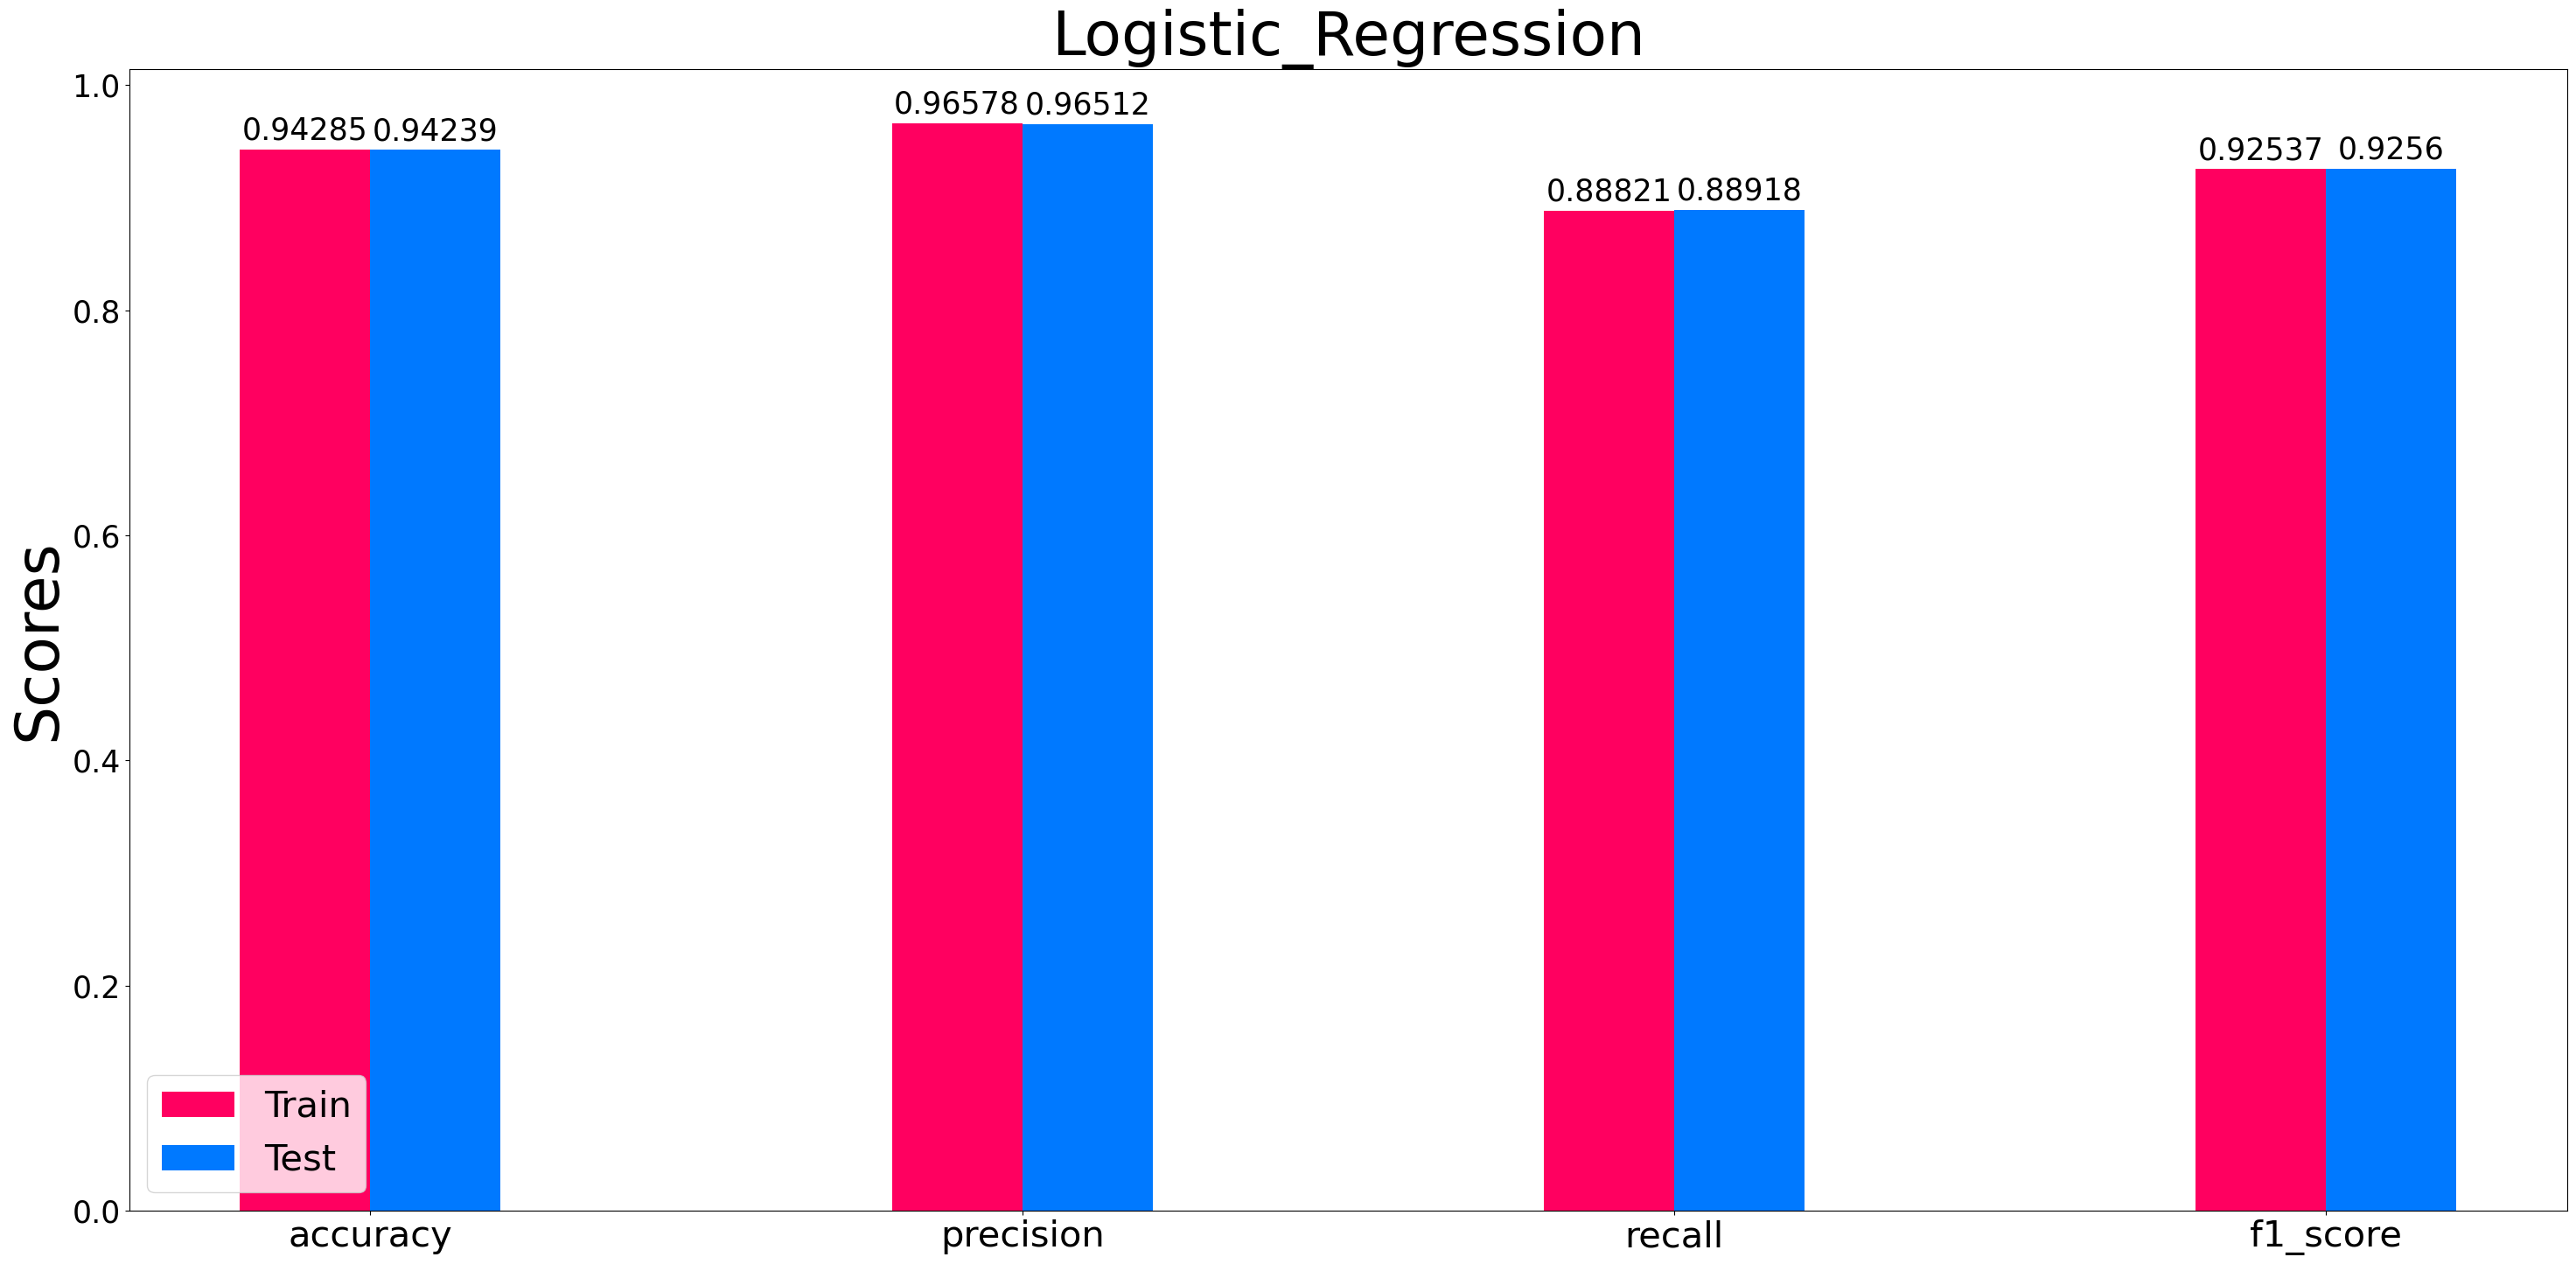

In [139]:
LR_train = []
LR_test = []

# train
LR_train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.precision_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.recall_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.f1_score(y_train, LR_y_pred_train), 5))
# test
LR_test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.precision_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.recall_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.f1_score(y_test, LR_y_pred_test), 5))
# plot
plotplot(category,LR_train,LR_test,'Logistic_Regression','#FF0060' ,'#0079FF')

#### KNN

In [140]:
knn_clf = KNN(X_scale_train, y_train)

Best K is: 3 



In [141]:
knn_y_pred_train = knn_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train), 5))
evo_met(y_train, knn_y_pred_train,'KNN train')

confusion matrix of KNN train is:



,Predicted Negative,Predicted Positive
Actual Negative,8868,229
Actual Positive,209,5829


In [142]:
knn_y_pred_test = knn_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
evo_met(y_test, knn_y_pred_test,'KNN test')

confusion matrix of KNN test is:



,Predicted Negative,Predicted Positive
Actual Negative,2148,111
Actual Positive,126,1399


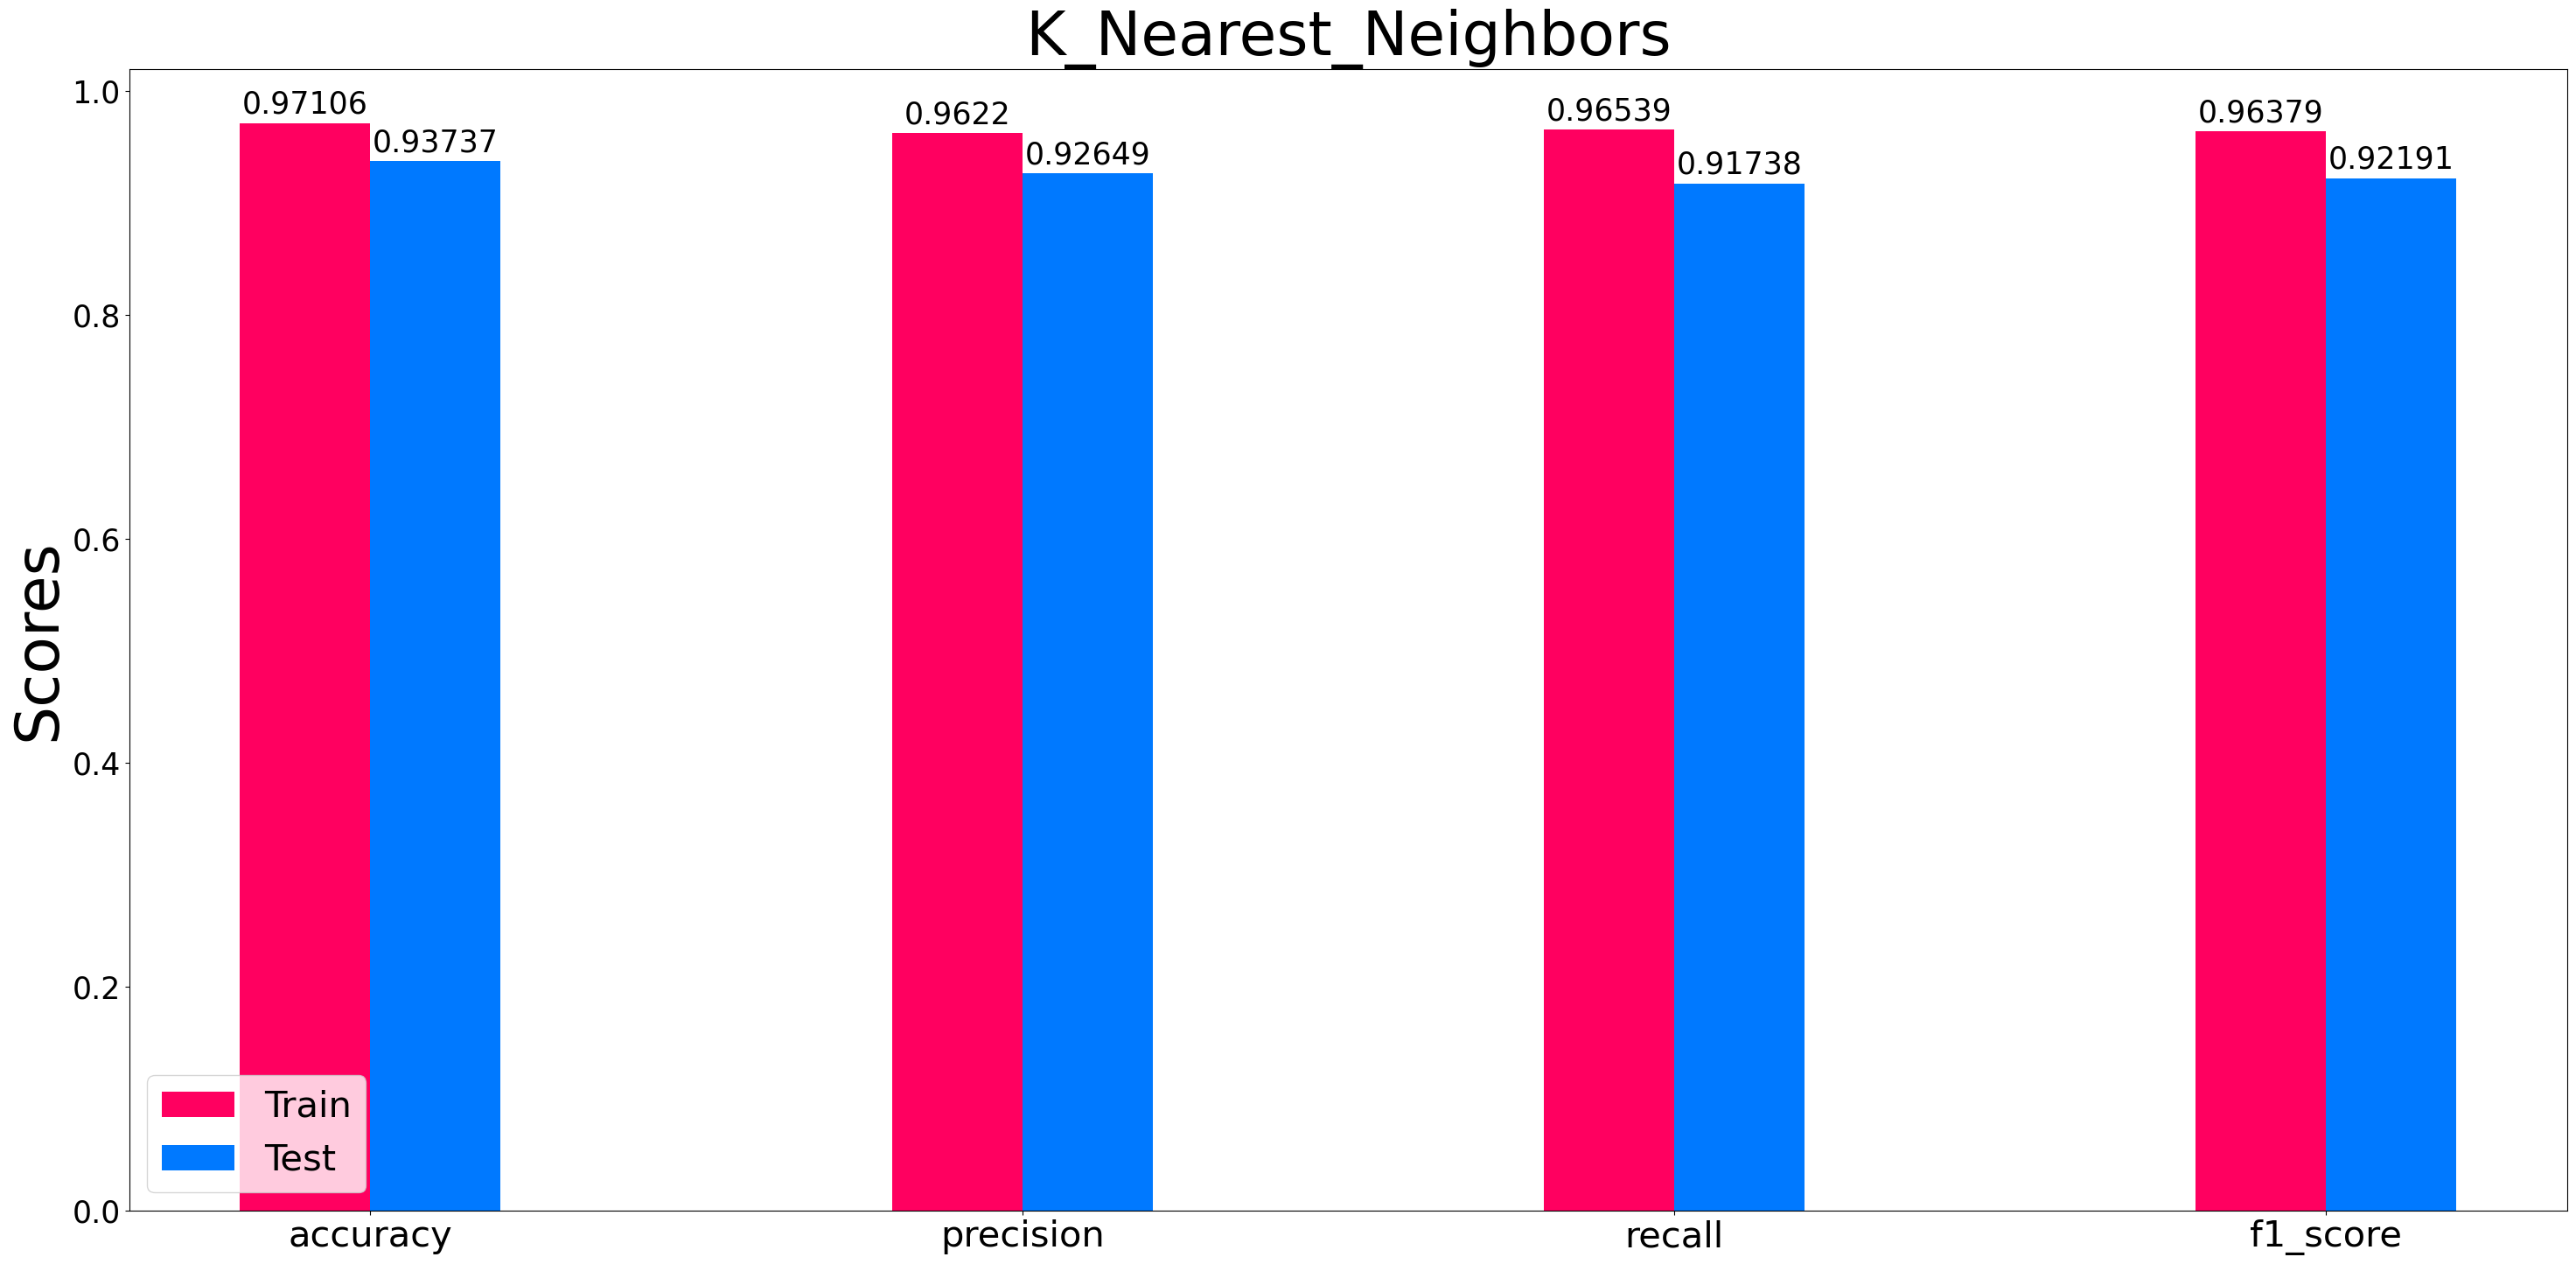

In [143]:
knn_train = []
knn_test = []

# train
knn_train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.precision_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.recall_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.f1_score(y_train, knn_y_pred_train), 5))
# test
knn_test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.precision_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.recall_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.f1_score(y_test, knn_y_pred_test), 5))
# plot
plotplot(category,knn_train,knn_test,'K_Nearest_Neighbors','#FF0060' ,'#0079FF')

##### decision_tree

In [144]:
DT_clf = decision_tree(X_scale_train, y_train)

Best max depth is: 10 

Best min samples split: 5 



In [145]:
DT_y_pred_train = DT_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
evo_met(y_train, DT_y_pred_train,'decision tree train')

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,9025,72
Actual Positive,22,6016


In [146]:
DT_y_pred_test = DT_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
evo_met(y_test, DT_y_pred_test,'decision tree test')

confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,2223,36
Actual Positive,21,1504


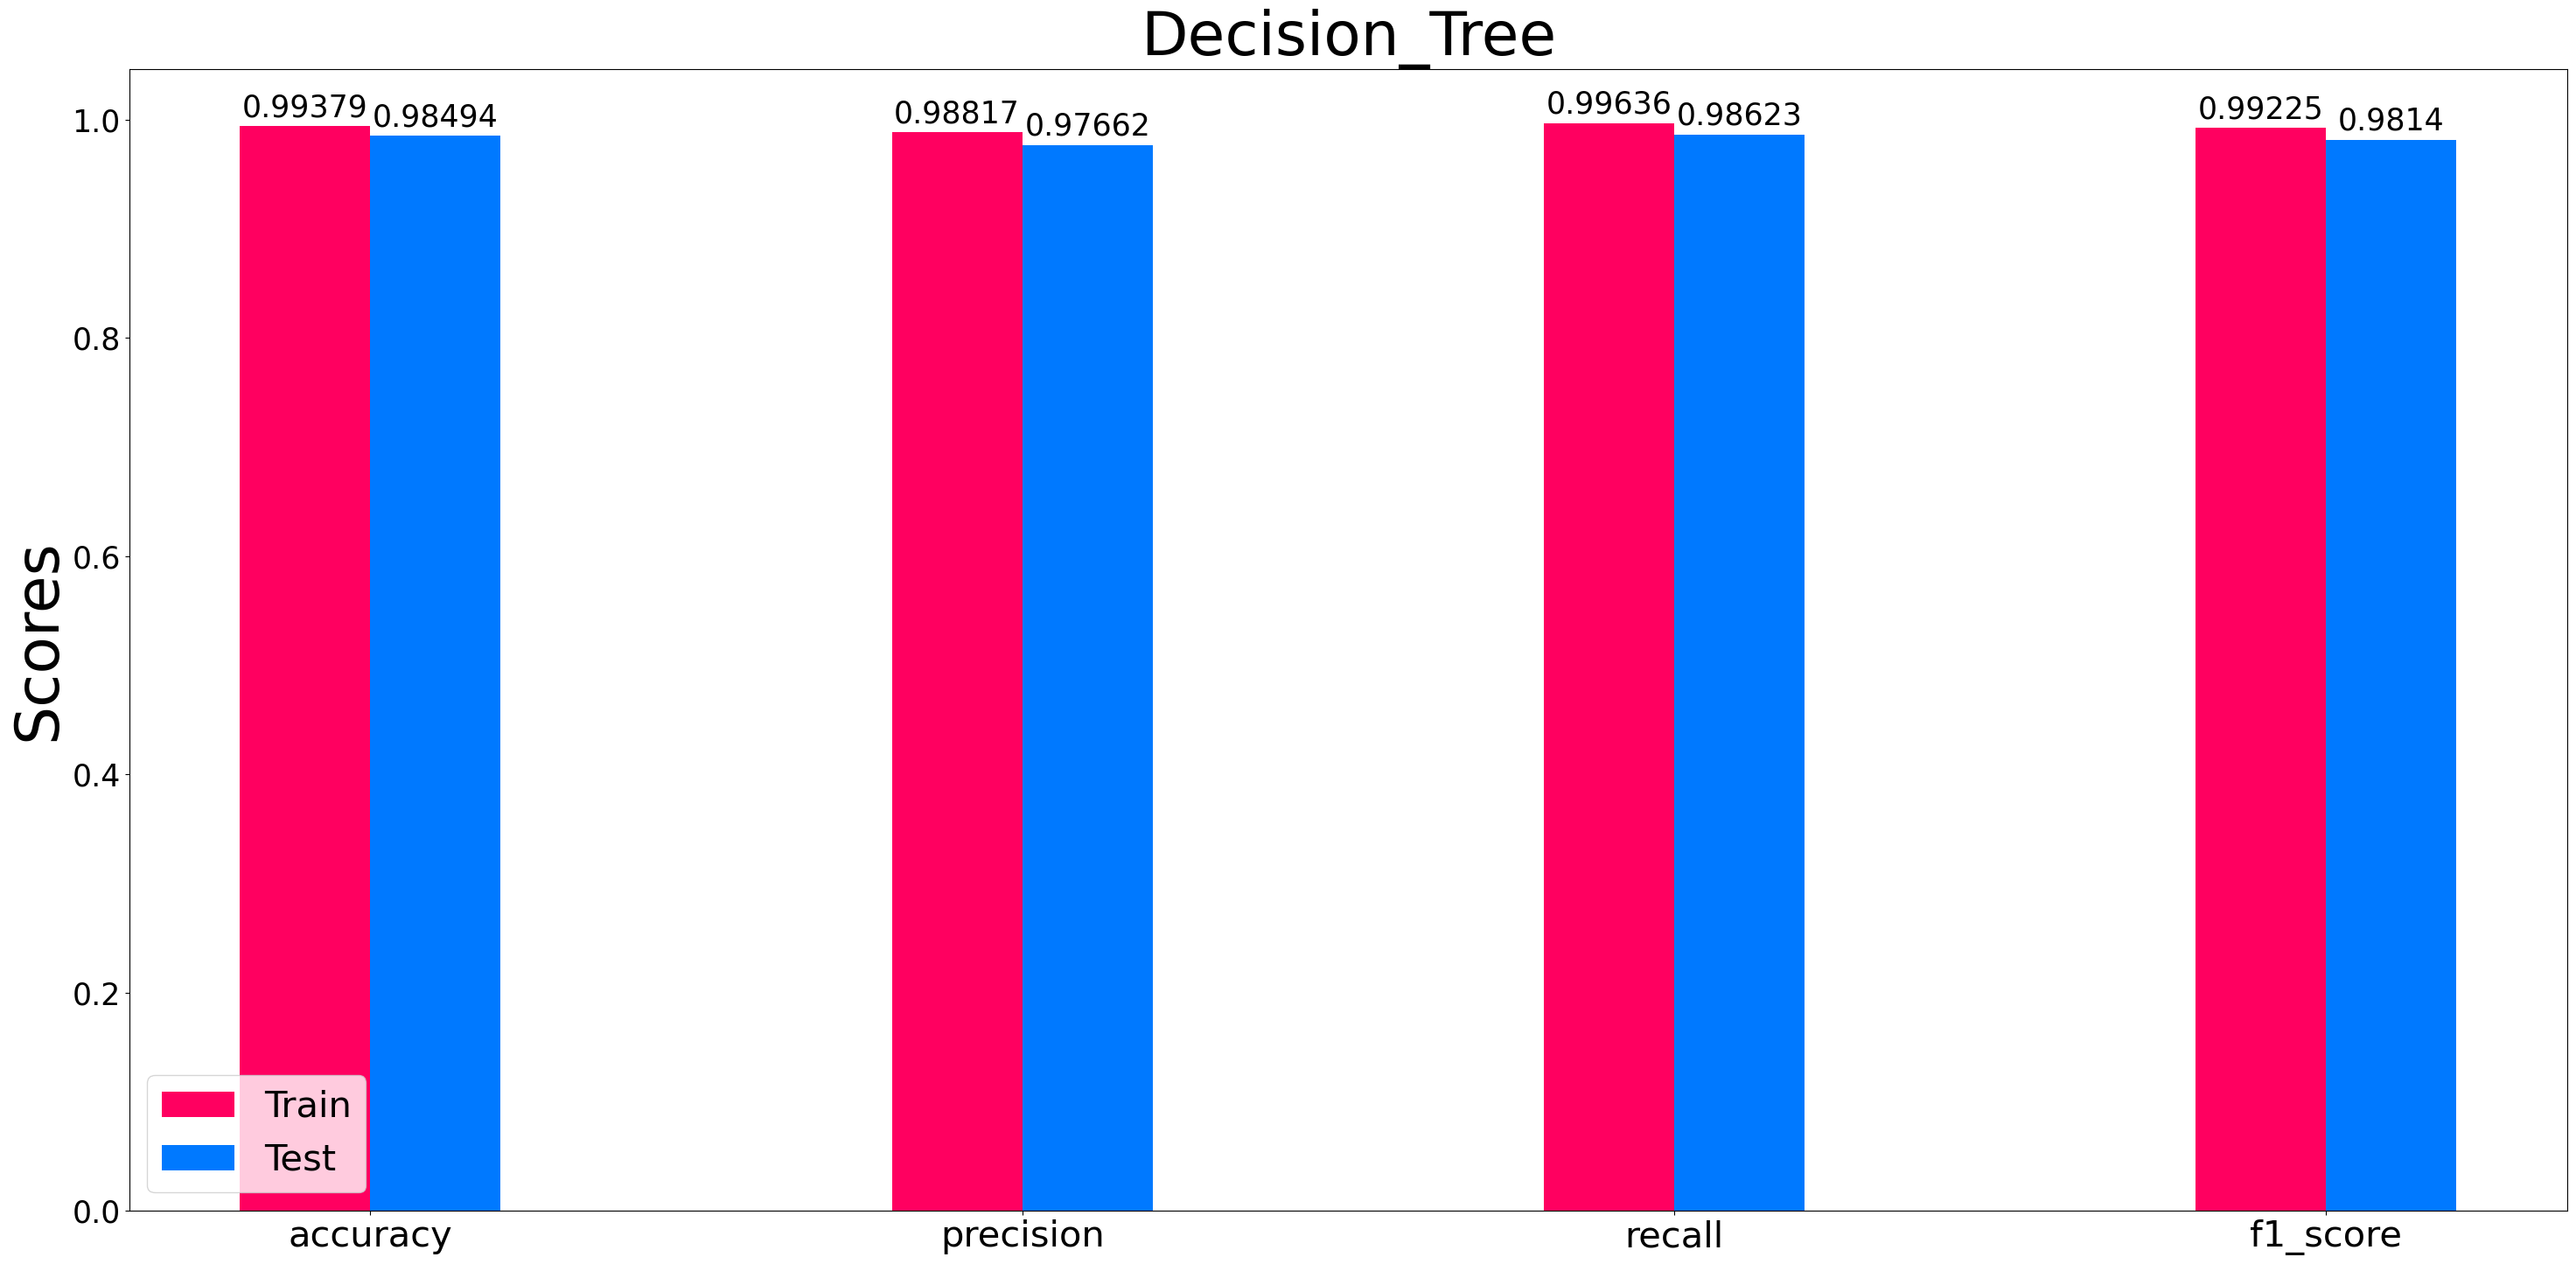

In [147]:
DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
plotplot(category,DT_train,DT_test,'Decision_Tree','#FF0060' ,'#0079FF')

##### Compare models by accuracy

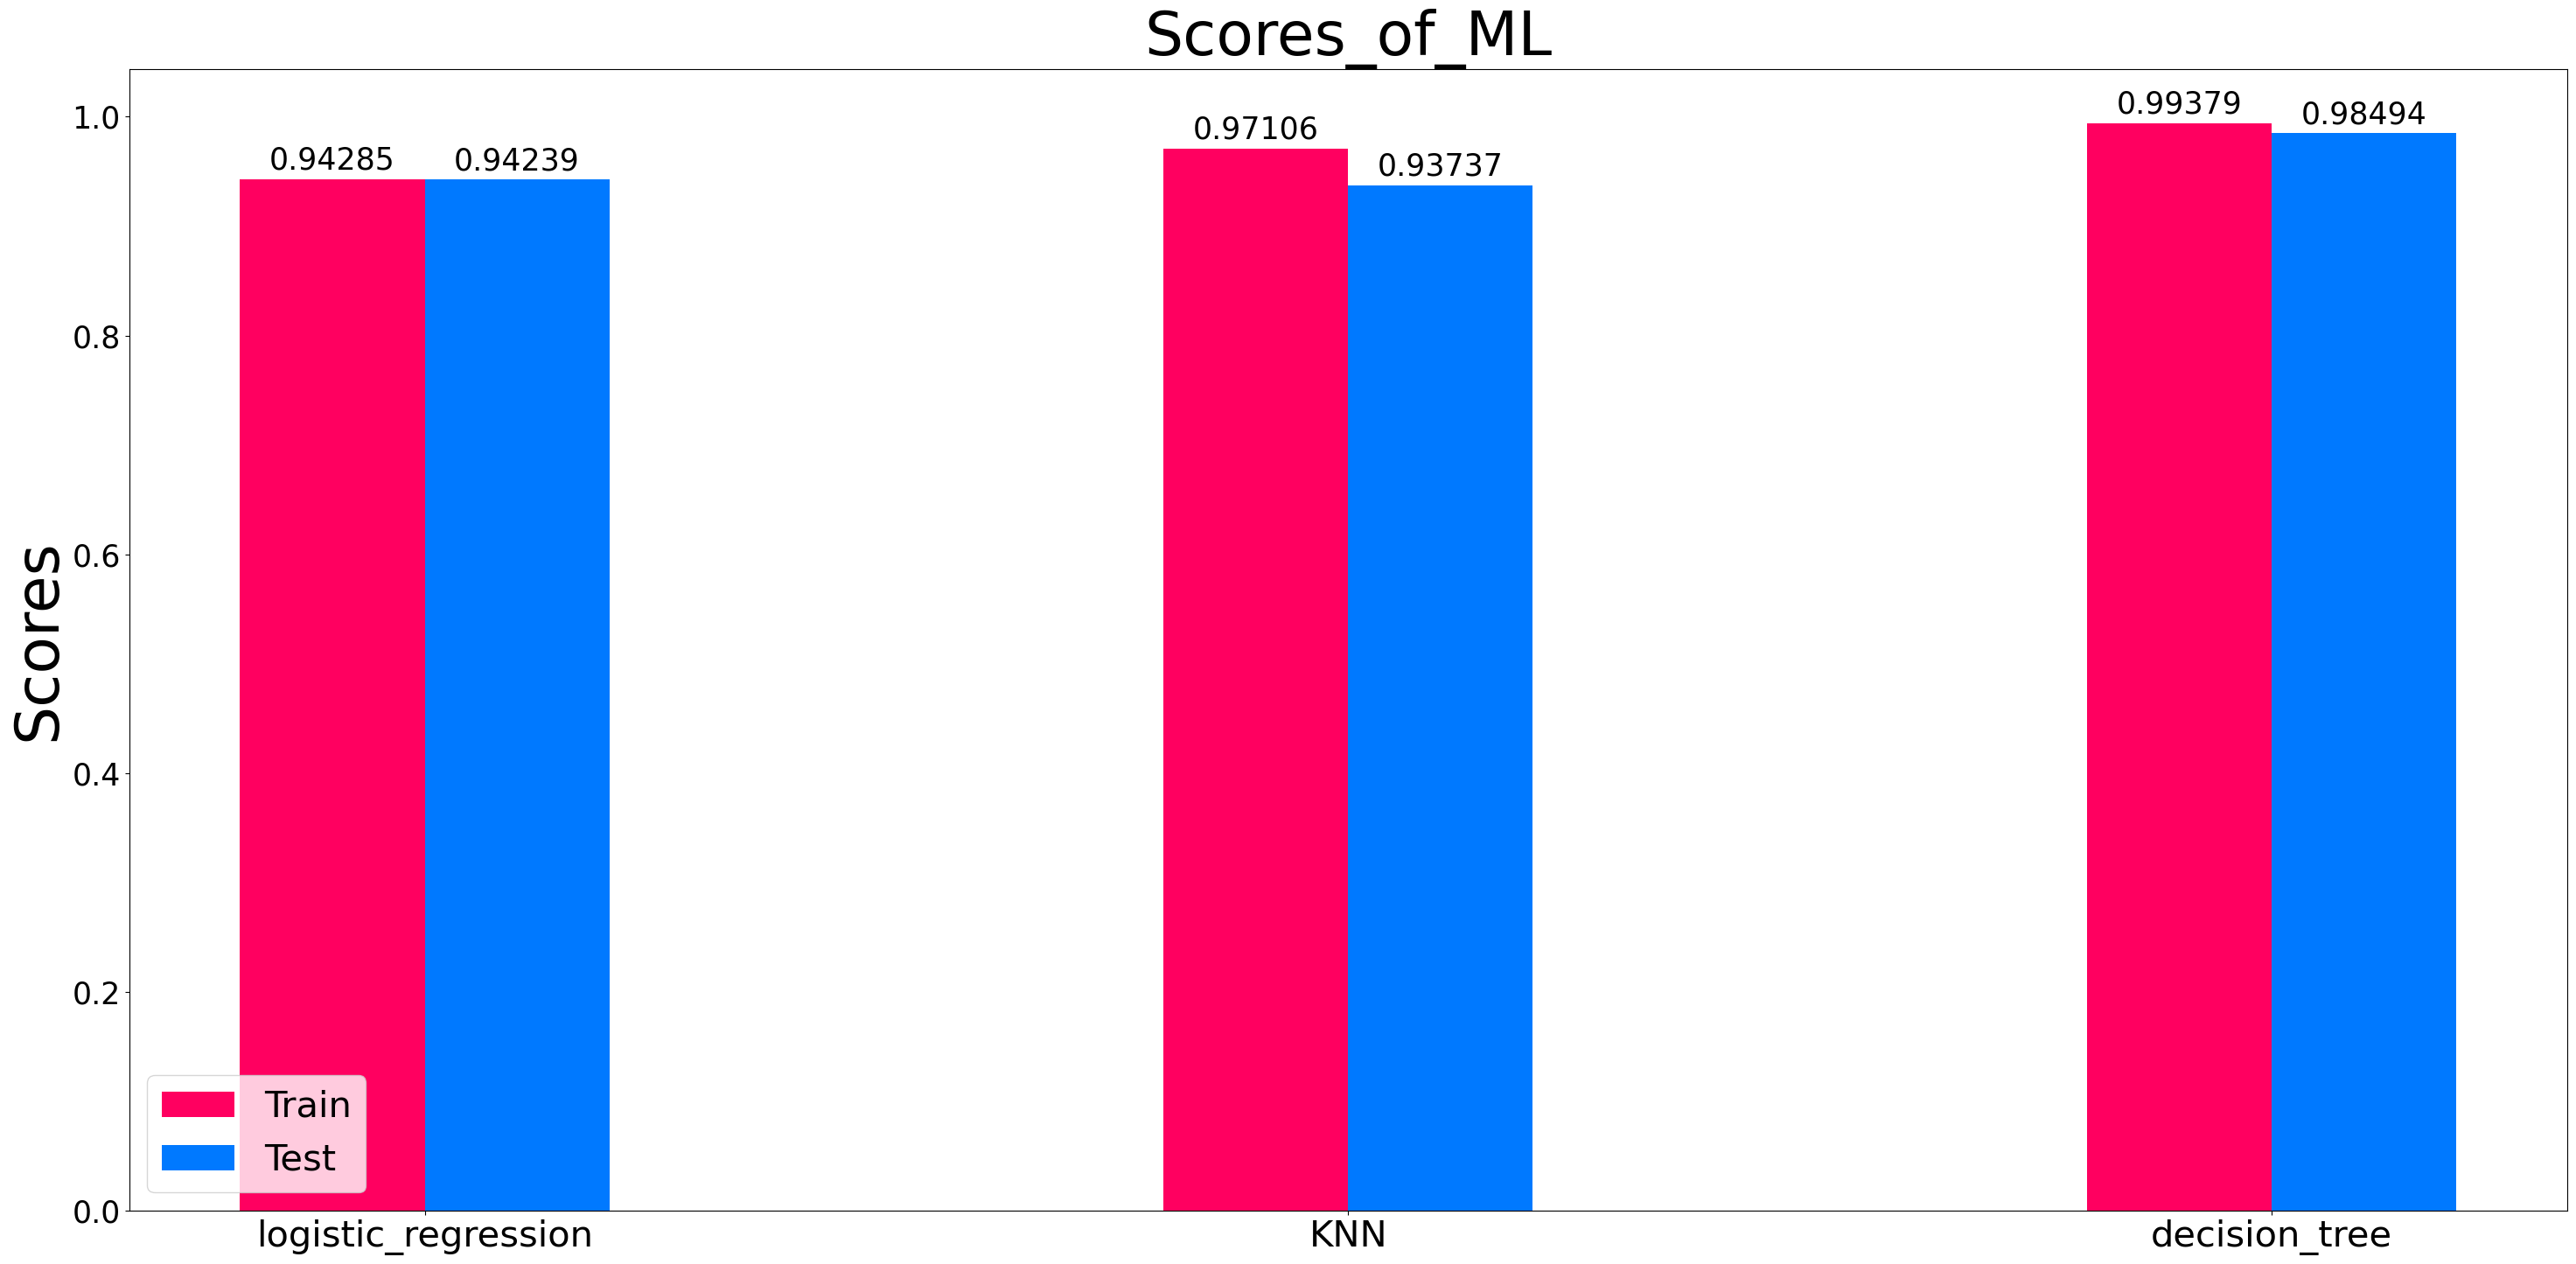

In [148]:
def plotplot(machine,train,test,name,color1,color2):
    
    font = {'size': 25}
    plt.rc('font', **font)

    x = np.arange(len(machine))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(30,15))
    rects1 = ax.bar(x - width/2, train, width, label='Train',color=color1)
    rects2 = ax.bar(x + width/2, test, width, label='Test',color=color2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores',fontsize=50)
    ax.set_title(name,fontsize=50)
    ax.set_xticks(x)
    ax.set_xticklabels(machine,fontsize=30)
    ax.legend(fontsize=30,loc="lower left")


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()
    
    
plotplot(machine,train,test,'Scores_of_ML','#FF0060' ,'#0079FF')

#### Based on the provided information, the Decision Tree model is the best choice due to its high accuracy, good generalization, and balanced performance on both the training and testing datasets, thus we will continue with said model.

## EU Model

In [149]:
df_ml_eu = df.copy()
df_ml_eu.drop(['na_sucsses','japan_sucsses','other_sucsses'],axis=1, inplace = True)
df_ml_eu

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,eu_sucsses
0,2067,0,0.652664,1.000000,0.456221,1.000000,2013,1,1
1,2067,0,0.620902,0.985787,0.276498,0.967949,2014,1,1
2,2067,0,0.861680,0.557360,0.216590,0.570513,2002,1,0
3,2067,0,0.928279,0.541117,0.027650,0.455128,2013,1,0
4,621,0,0.716189,0.457868,0.138249,0.416667,2001,1,0
...,...,...,...,...,...,...,...,...,...
18914,1099,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18915,44,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18916,57,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18917,44,19,0.001025,0.001015,0.000000,0.003205,2013,1,0


In [150]:
X_train, X_test, y_train, y_test = split_train_and_test(df_ml_eu,'eu_sucsses')

In [151]:
scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

In [152]:
# Lists
category = ['accuracy','precision','recall','f1_score']
train = []
test = []

In [153]:
DT_clf = decision_tree(X_scale_train, y_train)

Best max depth is: 10 

Best min samples split: 5 



In [154]:
DT_y_pred_train = DT_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
evo_met(y_train, DT_y_pred_train,'decision tree train')

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,14262,28
Actual Positive,53,792


In [155]:
DT_y_pred_test = DT_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
evo_met(y_test, DT_y_pred_test,'decision tree test')

confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,3567,18
Actual Positive,30,169


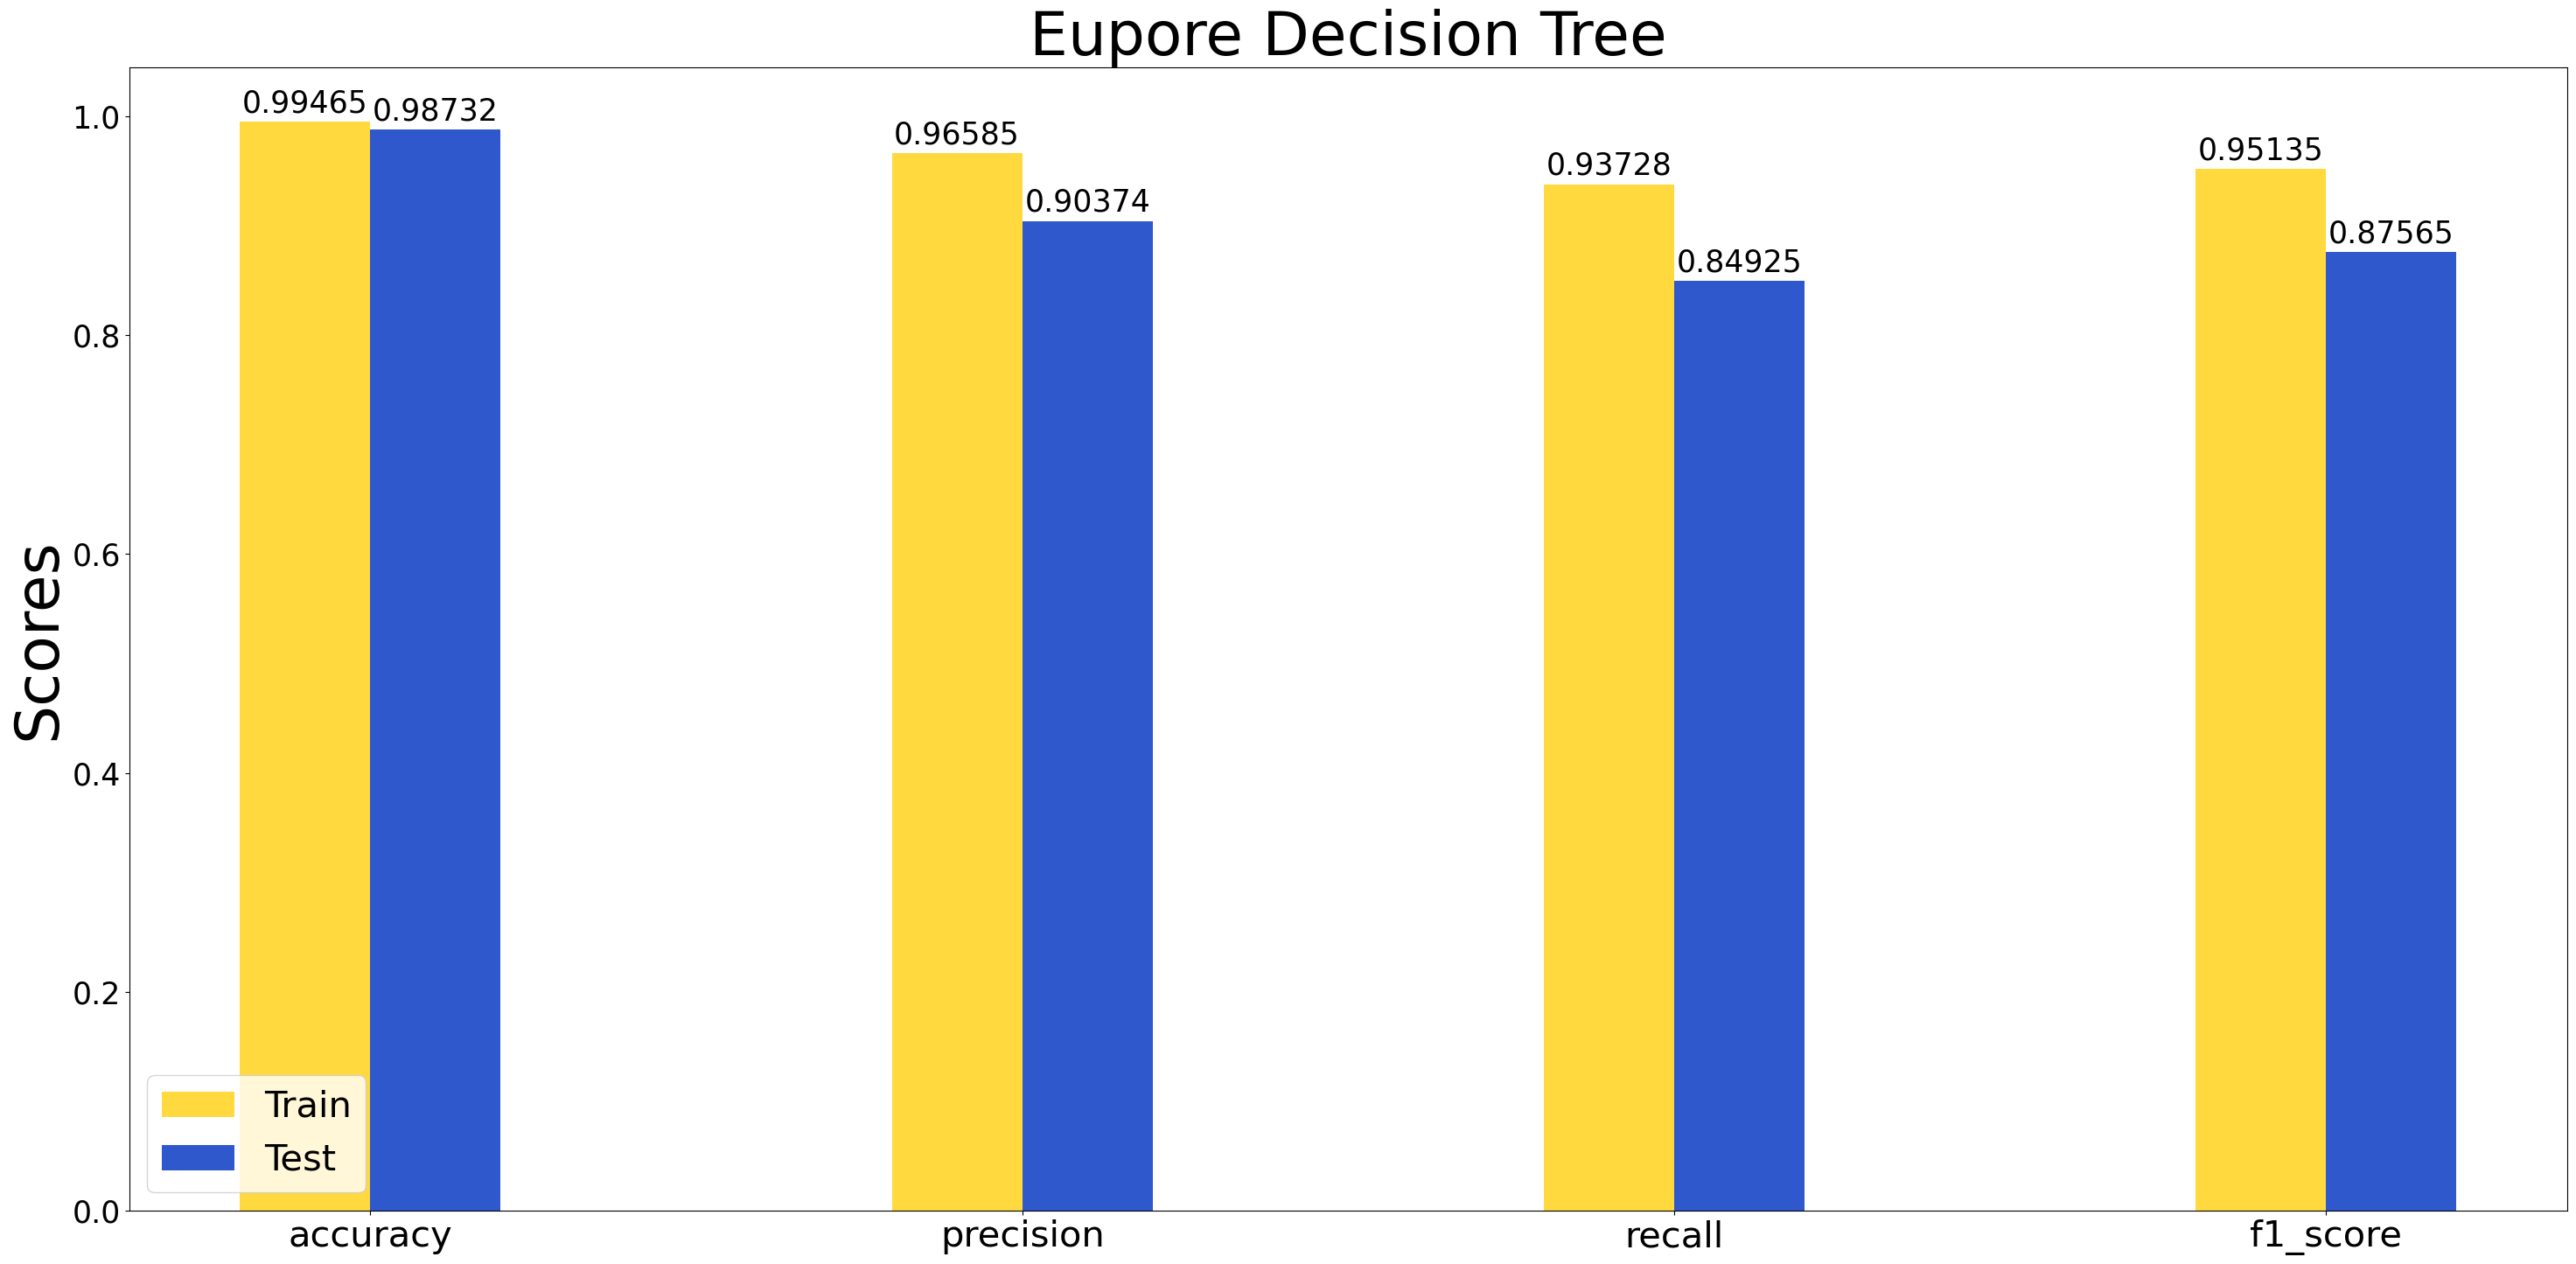

In [156]:
DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
plotplot(category,DT_train,DT_test, 'Eupore Decision Tree', '#FFD93D' , '#2F58CD')

## Japan Model

In [157]:
df_ml_jp = df.copy()
df_ml_jp.drop(['na_sucsses','eu_sucsses','other_sucsses'],axis=1, inplace = True)
df_ml_jp

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,japan_sucsses
0,2067,0,0.652664,1.000000,0.456221,1.000000,2013,1,0
1,2067,0,0.620902,0.985787,0.276498,0.967949,2014,1,0
2,2067,0,0.861680,0.557360,0.216590,0.570513,2002,1,0
3,2067,0,0.928279,0.541117,0.027650,0.455128,2013,1,0
4,621,0,0.716189,0.457868,0.138249,0.416667,2001,1,0
...,...,...,...,...,...,...,...,...,...
18914,1099,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18915,44,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18916,57,19,0.001025,0.001015,0.000000,0.003205,2018,2,0
18917,44,19,0.001025,0.001015,0.000000,0.003205,2013,1,0


In [158]:
X_train, X_test, y_train, y_test = split_train_and_test(df_ml_jp,'japan_sucsses')

In [159]:
scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

In [160]:
# Lists
category = ['accuracy','precision','recall','f1_score']
train = []
test = []

In [161]:
DT_clf = decision_tree(X_scale_train, y_train)

Best max depth is: 10 

Best min samples split: 5 



In [162]:
DT_y_pred_train = DT_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
evo_met(y_train, DT_y_pred_train,'decision tree train')

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,7746,1
Actual Positive,4,7384


In [163]:
DT_y_pred_test = DT_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
evo_met(y_test, DT_y_pred_test,'decision tree test')

confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,1906,4
Actual Positive,5,1869


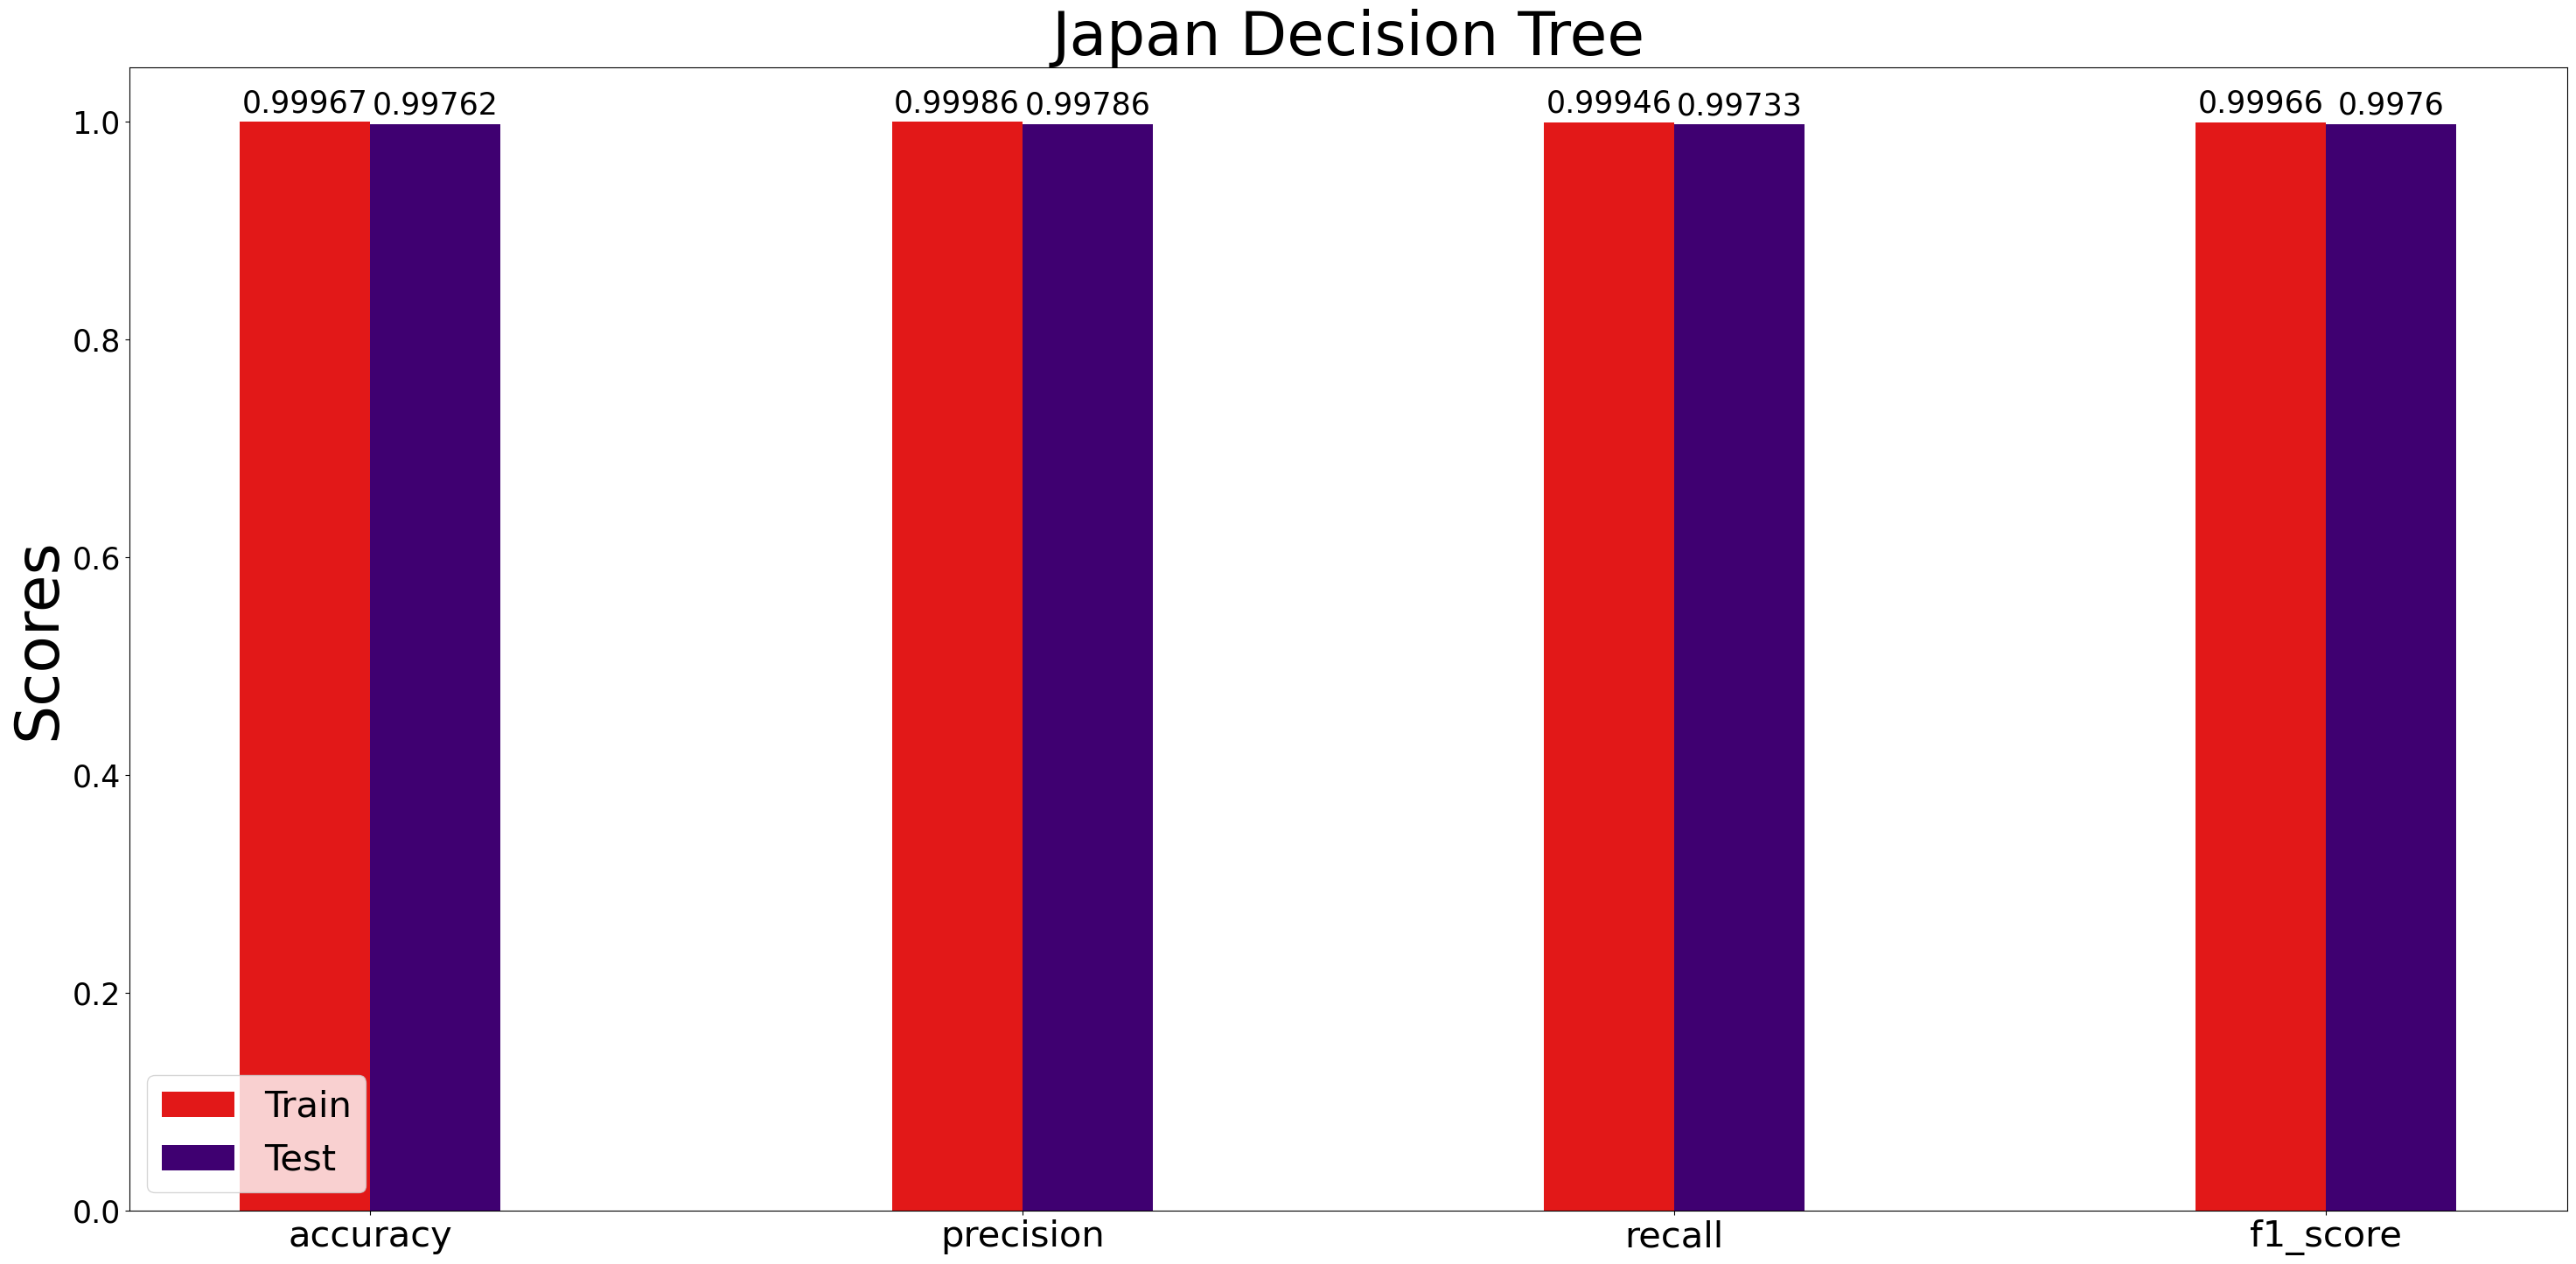

In [164]:
DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
plotplot(category,DT_train,DT_test,'Japan Decision Tree','#E21818', '#3F0071')

## Other Model

In [165]:
df_ml_other = df.copy()
df_ml_other.drop(['na_sucsses','eu_sucsses','japan_sucsses'],axis=1, inplace = True)
df_ml_other

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,other_sucsses
0,2067,0,0.652664,1.000000,0.456221,1.000000,2013,1,0
1,2067,0,0.620902,0.985787,0.276498,0.967949,2014,1,0
2,2067,0,0.861680,0.557360,0.216590,0.570513,2002,1,0
3,2067,0,0.928279,0.541117,0.027650,0.455128,2013,1,0
4,621,0,0.716189,0.457868,0.138249,0.416667,2001,1,0
...,...,...,...,...,...,...,...,...,...
18914,1099,19,0.001025,0.001015,0.000000,0.003205,2018,2,1
18915,44,19,0.001025,0.001015,0.000000,0.003205,2018,2,1
18916,57,19,0.001025,0.001015,0.000000,0.003205,2018,2,1
18917,44,19,0.001025,0.001015,0.000000,0.003205,2013,1,1


In [166]:
X_train, X_test, y_train, y_test = split_train_and_test(df_ml_other,'other_sucsses')

In [167]:
scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

In [168]:
# Lists
category = ['accuracy','precision','recall','f1_score']
train = []
test = []

In [169]:
DT_clf = decision_tree(X_scale_train, y_train)

Best max depth is: 10 

Best min samples split: 5 



In [170]:
DT_y_pred_train = DT_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
evo_met(y_train, DT_y_pred_train,'decision tree train')

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,14237,34
Actual Positive,28,836


In [171]:
DT_y_pred_test = DT_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
evo_met(y_test, DT_y_pred_test,'decision tree test')

confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,3577,21
Actual Positive,20,166


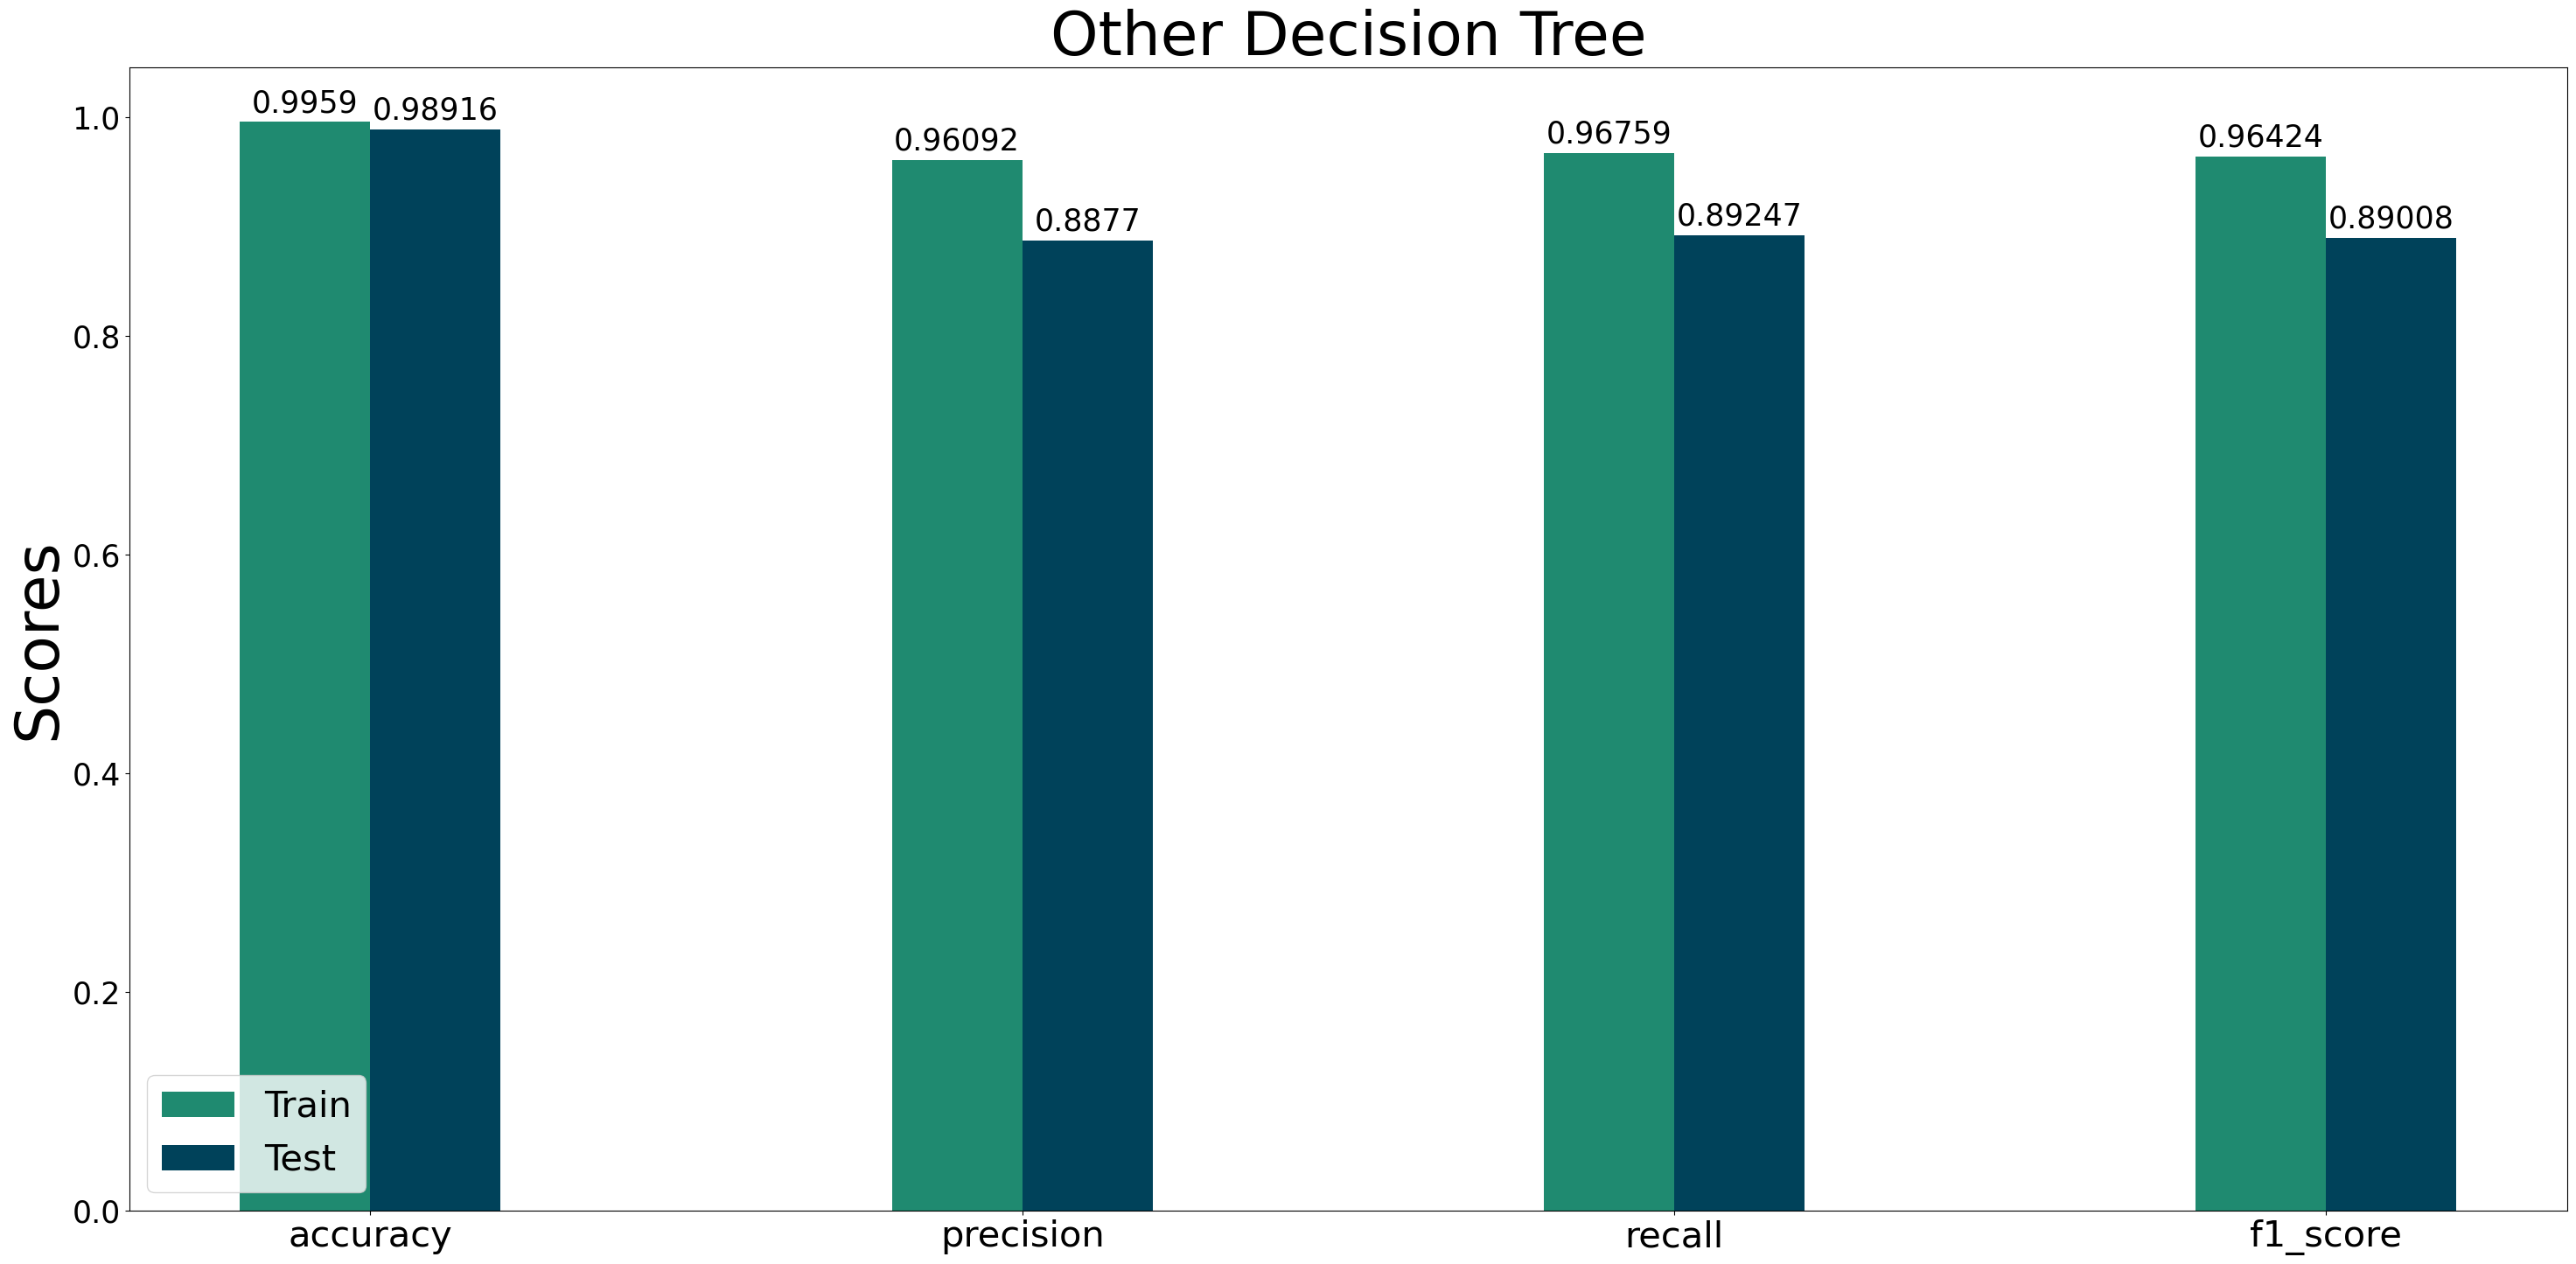

In [172]:
DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
plotplot(category,DT_train,DT_test,'Other Decision Tree','#1F8A70', '#00425A')